In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

import pandas as pd
data = pd.read_excel('data_0.25.xlsx')
data_val = pd.read_excel('validation_0.25.xlsx')
Age=[
      [["min",18],0],
      [[18,30],1],
      [[30,39],2],
      [[39,49],3],
      [[49,59],4],
      [[59,69],5],
      [[69,79],6],
      [[79,"max"],7]
    ]

for i,j in Age:
    
    section = i
        
    new = j
    if "min" in section:
        data.loc[data['Age'] < section[1],'Age'] = new
        data_val.loc[data_val['Age'] < section[1],'Age'] = new
    elif "max" in section:
        data.loc[data['Age'] > section[0],'Age'] = new
        data_val.loc[data_val['Age'] > section[0],'Age'] = new
    else:
        data.loc[(data['Age']>=section[0]) & (data['Age']<=section[1]),'Age'] = new
        data_val.loc[(data_val['Age']>=section[0]) & (data_val['Age']<=section[1]),'Age'] = new
    

In [3]:
class_age  = data.groupby(by=['Age'])

In [4]:
x_dic = {}
for i,j in class_age:
    temp = pd.DataFrame(j)
    temp = temp.isnull().sum(axis=0)

    x_dic[i] = temp
    
    
    

In [7]:
def plot_(dic_):
    
    
    
    
    labels = list(dic_.keys())
    data = [i.tolist() for i in dic_.values()]
    
    for i in labels:
        nums = dic_[i].copy()
        mean = nums.mean()
        std = nums.std()
        
        up = mean + 2.5*std
        low = mean - 2.5*std
        
        nums[(nums>up) | (nums<low)] = 0
        

        nums.to_excel(f'{i}缺失值离群情况.xlsx')
        
        
        
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为宋体
    plt.rcParams['axes.unicode_minus'] = False 
    plt.xlabel('Age group')
    plt.ylabel('Number of outliers')
    plt.grid(True)  # 显示网格
    plt.boxplot(data,
            medianprops={'color': 'red', 'linewidth': '1.5'},
            meanline=True,
            showmeans=True,
            meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10},
            labels=labels)
    plt.savefig('output.tif', dpi=300)
    plt.show()

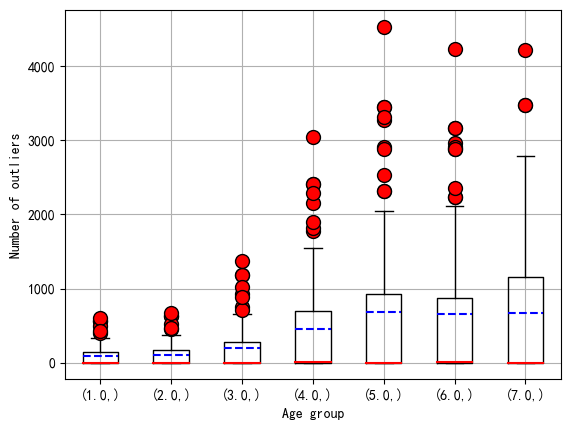

In [8]:
plot_(x_dic)